## Primo Esercizio Machine Learning


**Obiettivo**: creare un algoritmo capace di imparare a classificare le diverse specie di pinguini a partire dallle caratteristiche di un pinguino, usando il machine learning supervisionato.

La variabile **target** è la specie presente nella colonna `species`. Questa variabile è di tipo qualitativo, quindi l'algoritmo è un **classificatore** 

## Import delle librerie da utilizzare

In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Scelta dei dati da utilizzare

In [2]:
data = pd.read_csv('./penguins_size.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Scelta del target e delle features che andremo ad utilizzare

In [3]:
target = ["species"]
# caratteristiche da usare per il riconoscimento
features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

## Preparazione e pulizia dati

In questa fase dobbiamo anche trasformare le features qualitative in feature numeriche, in questo caso non è neccessario

In [8]:
# dropna lo faccio qua per non perdere troppi dati
# se lo facessi prima potrei perdere dati perchè le colonne che hanno un valore null sono irrilevanti
useful_data = data[features + target].dropna() 
useful_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


## Creazione grafico

In [19]:
np.unique(useful_data[target])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [21]:
species_color = {'Adelie': "red", 'Chinstrap': "yellow", 'Gentoo': "blue"}

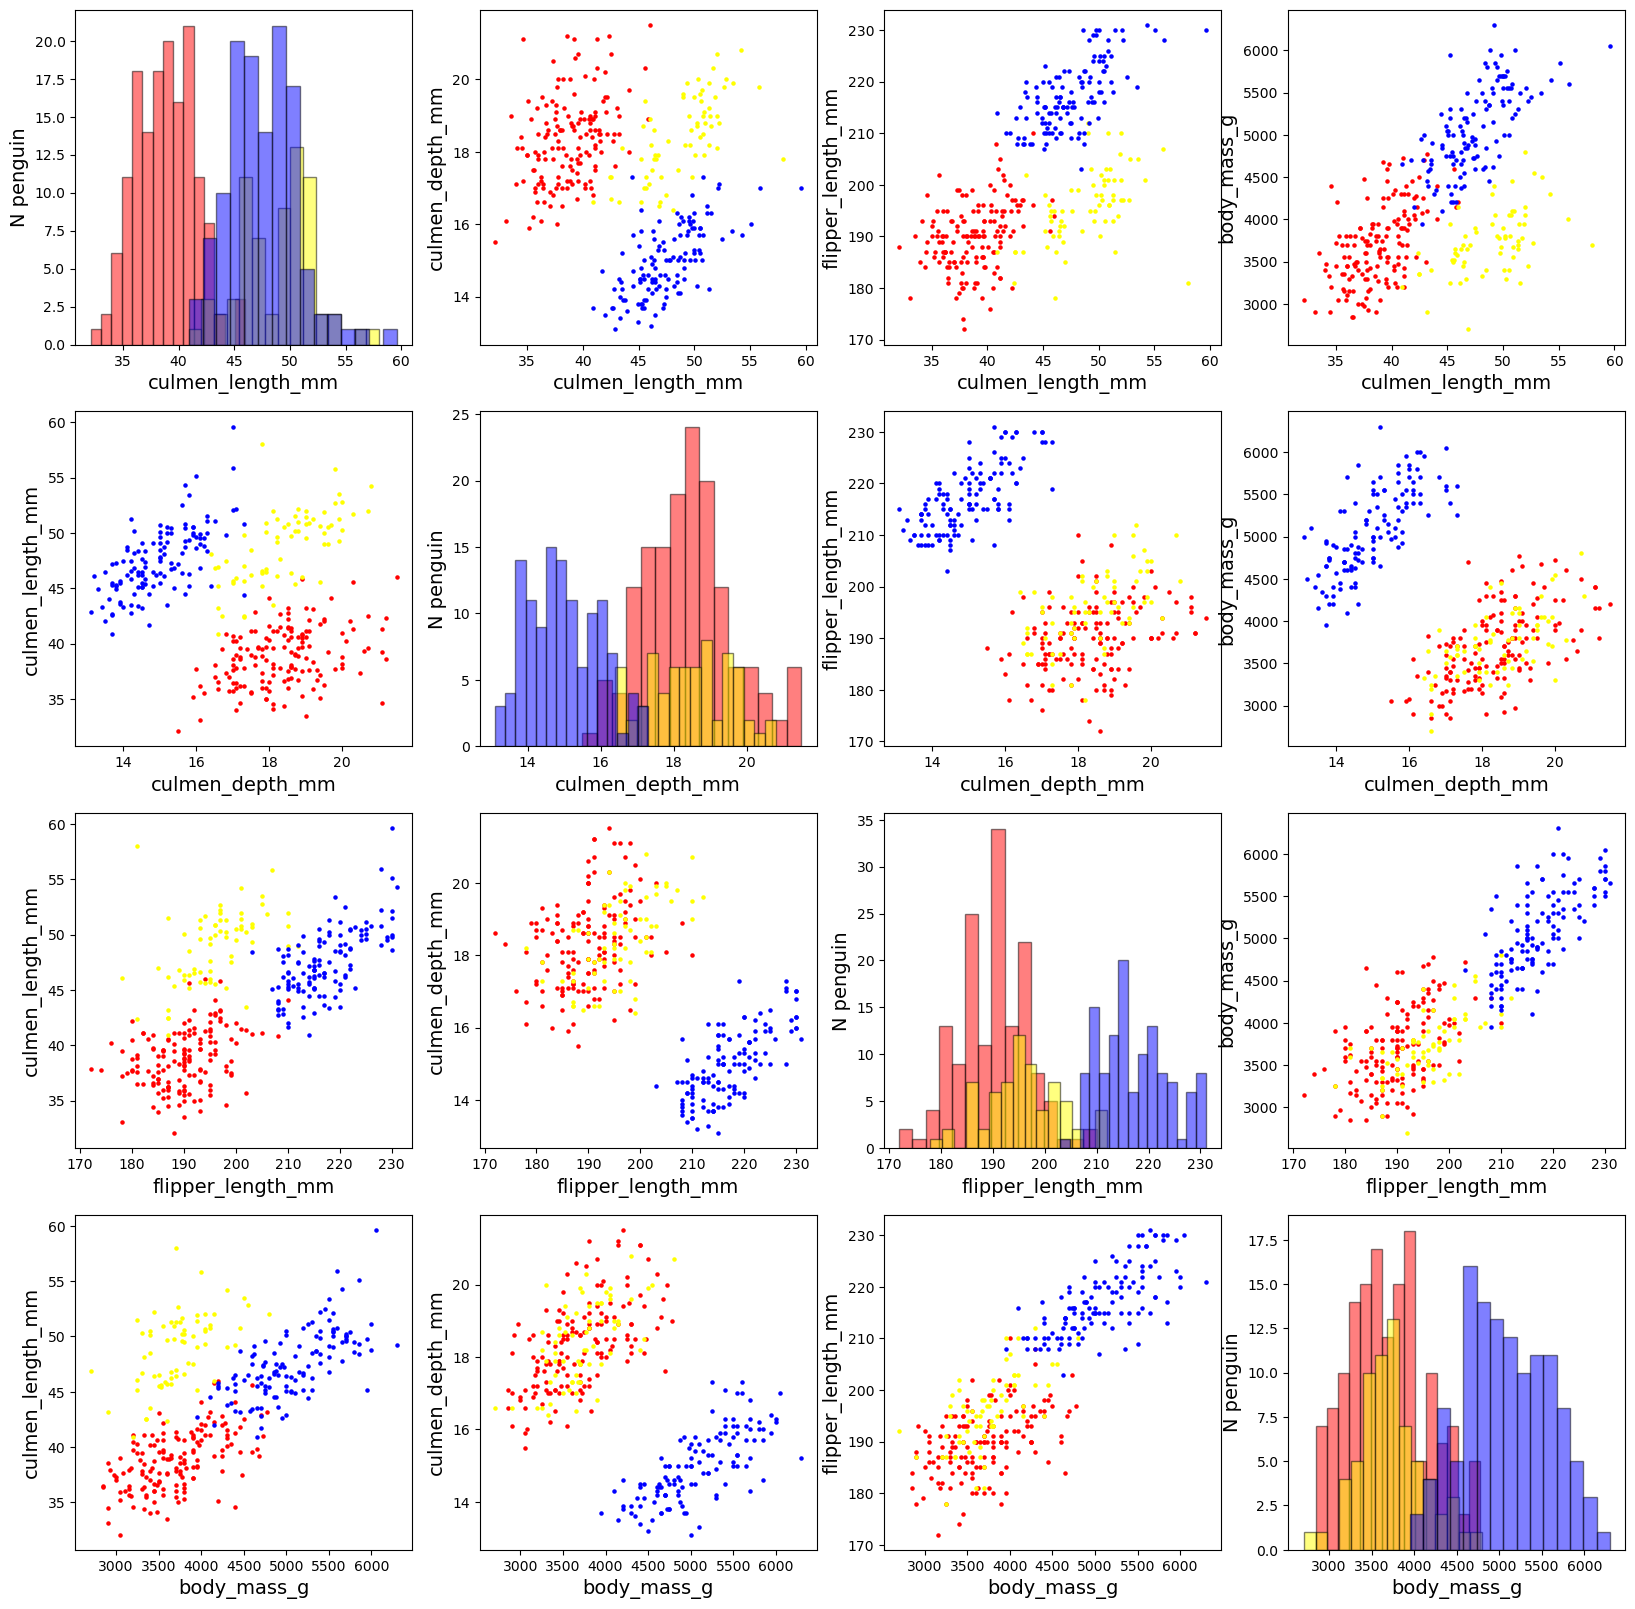

In [32]:
fig, axs = plt.subplots(4,4,figsize = (20, 20))

for i, f_i in enumerate(features):
    for j, f_j in enumerate(features):
        if i != j:
            for sp in species_color:
                filt = useful_data["species"] == sp # seleziono la specie
                axs[i,j].scatter(useful_data[filt][f_i], useful_data[filt][f_j], s = 5, c = species_color[sp])
                
            axs[i,j].set_xlabel(f_i, fontsize = 14)
            axs[i,j].set_ylabel(f_j, fontsize = 14)
        else:
            for sp in species_color:
                filt = useful_data["species"] == sp # seleziono la specie
                axs[i,j].hist(useful_data[filt][f_i], bins = 15,alpha = 0.5, edgecolor = "k", color = species_color[sp])
                
            axs[i,j].set_xlabel(f_i, fontsize = 14)
            axs[i,j].set_ylabel("N penguin", fontsize = 14)
        
plt.show()        

## Suddivisone dei dati in training set e test set

In [44]:
from sklearn.model_selection import train_test_split

In [33]:
X= useful_data[features] # dati in input: featuere, X maiuscola perchè i dati in input sono più di uno
y = useful_data[target] # variabile target

In [38]:
# splitto i dati in training e test set, random_state è il seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)

In [39]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
94,36.2,17.3,187.0,3300.0
313,49.5,16.1,224.0,5650.0
298,45.2,13.8,215.0,4750.0
321,55.9,17.0,228.0,5600.0
212,51.9,19.5,206.0,3950.0
...,...,...,...,...
84,37.3,17.8,191.0,3350.0
18,34.4,18.4,184.0,3325.0
231,49.0,16.1,216.0,5550.0
99,43.2,18.5,192.0,4100.0


La rete neurale potrebbe concentrarsi sui valori più grandi, quindi bisognerebbe fare la procedura di **normalizzazione**, 

anche detta di **standardizzazione**, delle feature, per riportare tutte le feature in un range comune, per esempio $\in[-1,1]$.

La faremo successivamente...

## Scelta del modello

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
# hidden layers size indica il numero di neuroni nei layer nascosti, il layer di input è fatto dal numero di features
model = MLPClassifier(hidden_layer_sizes=(5,5))

## Addestramento della rete neurale

In [79]:
model.fit(X_train, y_train)

c:\Users\Paolo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5, 5))

In [81]:
accuratezza  = model.score(X_test, y_test) * 100
print(f"Accuratezza: {accuratezza:.2f}%")
# l'accuratezza è bassa perchè non abbiamo fatto la normalizzazione

Accuratezza: 20.83%
